<a href="https://colab.research.google.com/github/ACombey/Hello-World/blob/main/Walmart_projetc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importations du fichier

A transferer sur github

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content/Walmart_ML_Project'

In [ ]:
#!rm -rf Walmart_ML_Project
!git clone https://github.com/ACombey/Walmart_ML_Project.git
%cd Walmart_ML_Project


Cloning into 'Walmart_ML_Project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
Receiving objects: 100% (3/3), 4.53 KiB | 4.53 MiB/s, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
/content/Walmart_ML_Project/Walmart_ML_Project


# Exploration du dataset

In [ ]:
import pandas as pd
df = pd.read_csv("Walmart_Store_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [ ]:
display(df.dtypes)

,0
Store,float64
Date,object
Weekly_Sales,float64
Holiday_Flag,float64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


In [ ]:
taille_initiale = df.shape
taille_initiale

(150, 8)

# Pre-traitement des colonnes

In [ ]:
# ------------ Colonne Store ---------------- #
# Suppression de la colonne

# Visualisation des variables
print("Exemple de variables:" , df['Store'].unique())
# Nb valeurs uniques
print("Nb de valeurs uniques:", len(df['Store'].unique()))
# Nb valeurs totales
print("Nb de valeurs totales:", df['Store'].count())
# Nb valeurs nulles
print("Nb de valeurs nulles:", df['Store'].isnull().sum())

Exemple de variables: [ 6. 13. 17. 11.  4. 15. 20. 14.  3.  8. 18.  7.  1.  2.  5. 19. 16. 12.
  9. 10.]
Nb de valeurs uniques: 20
Nb de valeurs totales: 150
Nb de valeurs nulles: 0


In [ ]:
# ------------ Colonne Weekly_Sales ---------------- #
# Suppression des valeurs manquantes

# Nb valeurs nulles
val_manq = df['Weekly_Sales'].isnull().sum()
print("Nombre de valeurs manquantes=",df['Weekly_Sales'].isnull().sum())
pourcentages=(val_manq/df.shape[0])*100
print("Quantité supprimée =",pourcentages.round(2).astype(str) + " %")
df = df.dropna(subset=['Weekly_Sales'])
print("Nombre de valeurs manquantes=", df['Weekly_Sales'].isnull().sum())


Nombre de valeurs manquantes= 14
Quantité supprimée = 9.33 %
Nombre de valeurs manquantes= 0


In [ ]:
# ------------ Temperature', 'Fuel_Price', 'CPI', 'Unemployment ---------------- #
#Suppression des outliers
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Copier le DataFrame pour filtrer (optionnel)
df_clean = df.copy()

for col in cols:
    mean = df_clean[col].mean()
    std = df_clean[col].std()
    lower = mean - 3 * std
    upper = mean + 3 * std

    # Garder seulement les lignes dans l'intervalle [mean - 3*std, mean + 3*std]
    df = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

print(f"Nombre de lignes après nettoyage : {df_clean.shape[0]}")

Nombre de lignes après nettoyage : 136


In [ ]:
print("Nombre de Nan")
print(df.isna().sum())

# Modification des Nan selon strategie de la mediane
df['Temperature'].fillna(df['Temperature'].median(), inplace=True)
df['Fuel_Price'].fillna(df['Fuel_Price'].median(), inplace=True)
df['CPI'].fillna(df['CPI'].median(), inplace=True)
df.loc[:, 'Unemployment'] = df['Unemployment'].fillna(df['Unemployment'].median())

Nombre de Nan
Store            0
Date            15
Weekly_Sales     0
Holiday_Flag    10
Temperature     11
Fuel_Price      11
CPI              9
Unemployment     0
dtype: int64


/tmp/ipython-input-2527688310.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature'].fillna(df['Temperature'].median(), inplace=True)
/tmp/ipython-input-2527688310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temperature'].fillna(df['Temperature'].median(), inplace=True)
/tmp/ipython-input-2527688310.py:6: FutureWarni

In [ ]:
# ------------ Colonne Date ---------------- #
# Changement de la colonne sous polusieurs colonnes format YY / MM / DD / HH

# Nb valeurs null
print(df['Date'].isnull().sum())
# Impossible d'attribuer les valeurs sans date.. -> suppression
# Ratio suppression
val_manq=df['Date'].isnull().sum()
pourcentages=(val_manq/df.shape[0])*100
print("Quantité supprimée =",pourcentages.round(2).astype(str) + " %")
df = df.dropna(subset=['Date'])
print ()
print("*****")
print ()

#Conversion en format Datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year.astype('int16')
df['Month'] = df['Date'].dt.month.astype('int16')
df['Day'] = df['Date'].dt.day.astype('int16')
df['Weekday'] = df['Date'].dt.weekday.astype('int16')   # 0 = lundi, 6 = dimanche
df['WeekdayName'] = df['Date'].dt.day_name()  # nom du jour en toutes lettres
print(df.head())

# Nb valeurs null
print("***")
print("Nombre de valeurs nulles:",df['Date'].isnull().sum())


15
Quantité supprimée = 12.82 %

*****

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0    6.0 2011-02-18    1572117.54           NaN        59.61       3.045   
1   13.0 2011-03-25    1807545.43           0.0        42.38       3.435   
4    6.0 2010-05-28    1644470.66           0.0        78.89       2.759   
5    4.0 2010-05-28    1857533.70           0.0        61.45       2.756   
6   15.0 2011-06-03     695396.19           0.0        69.80       4.069   

          CPI  Unemployment  Year  Month  Day  Weekday WeekdayName  
0  214.777523         6.858  2011      2   18        4      Friday  
1  128.616064         7.470  2011      3   25        4      Friday  
4  212.412888         7.092  2010      5   28        4      Friday  
5  126.160226         7.896  2010      5   28        4      Friday  
6  134.855161         7.658  2011      6    3        4      Friday  
***
Nombre de valeurs nulles: 0


In [ ]:
# ------------ Colonne Holiday_Flag ---------------- #
print(df['Holiday_Flag'].unique())
# Nb valeurs null
print(df['Holiday_Flag'].isnull().sum())
# Impossible d'attribuer une categorie aux Nan
# Ratio suppression
val_manq=df['Holiday_Flag'].isnull().sum()
pourcentages=(val_manq/df.shape[0])*100
print("Quantité supprimée =",pourcentages.round(2).astype(str) + " %")
df = df.dropna(subset=['Holiday_Flag'])


[nan  0.  1.]
9
Quantité supprimée = 8.82 %


In [ ]:
print("Nombres de lignes supprimees:",taille_initiale[0] - df.shape[0])
print("Soit:", round((1-(df.shape[0]/taille_initiale[0]))*100),2, "%")

Nombres de lignes supprimees: 57
Soit: 38 2 %


# Visualisation

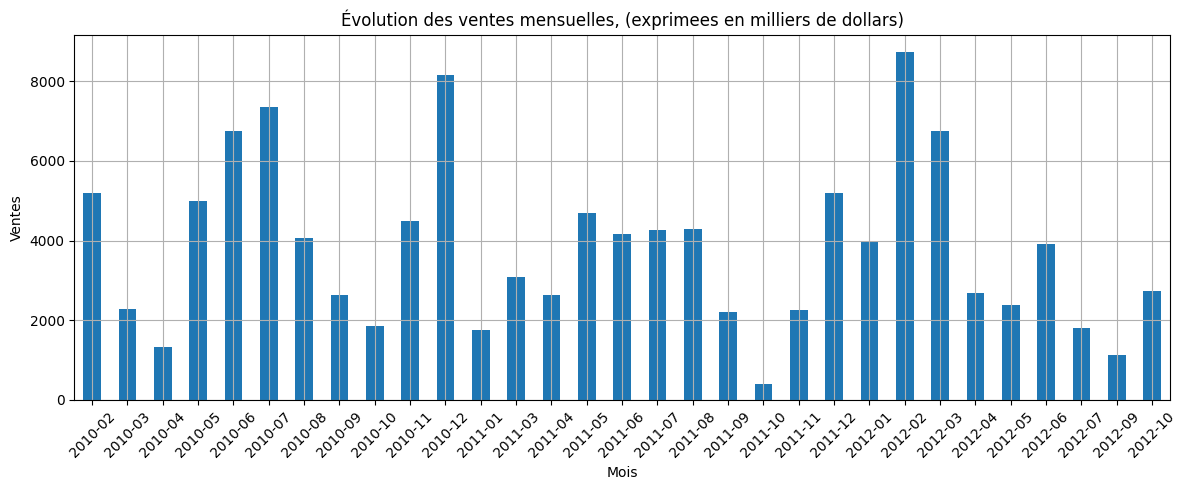

In [ ]:
import matplotlib.pyplot as plt
# Mise en forme pour obtenir "2020-01", "2020-02", etc.
df['Month2'] = df['Date'].dt.to_period('M')

# Regrouper les ventes par mois (ou autre variable)
monthly_sales = df.groupby('Month2')['Weekly_Sales'].sum()

# Tracer en barres
(monthly_sales/1000).plot(kind='bar', figsize=(12, 5))
plt.title("Évolution des ventes mensuelles, (exprimees en milliers de dollars)")
plt.ylabel("Ventes")
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

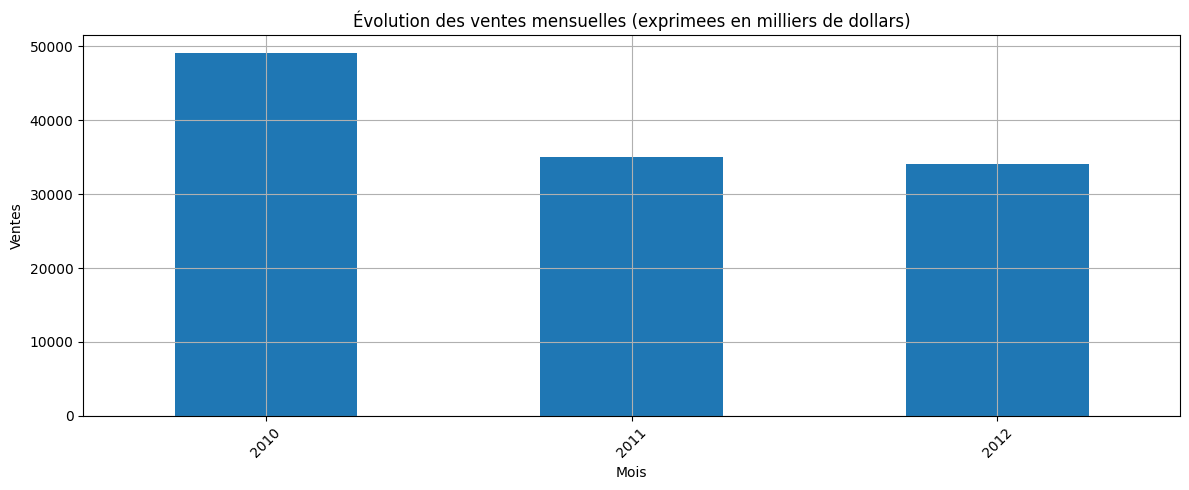

In [ ]:
# Regrouper les ventes par mois (ou autre variable)
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum()

# Tracer en barres
(yearly_sales/1000).plot(kind='bar', figsize=(12, 5))
plt.title("Évolution des ventes mensuelles (exprimees en milliers de dollars)")
plt.ylabel("Ventes")
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

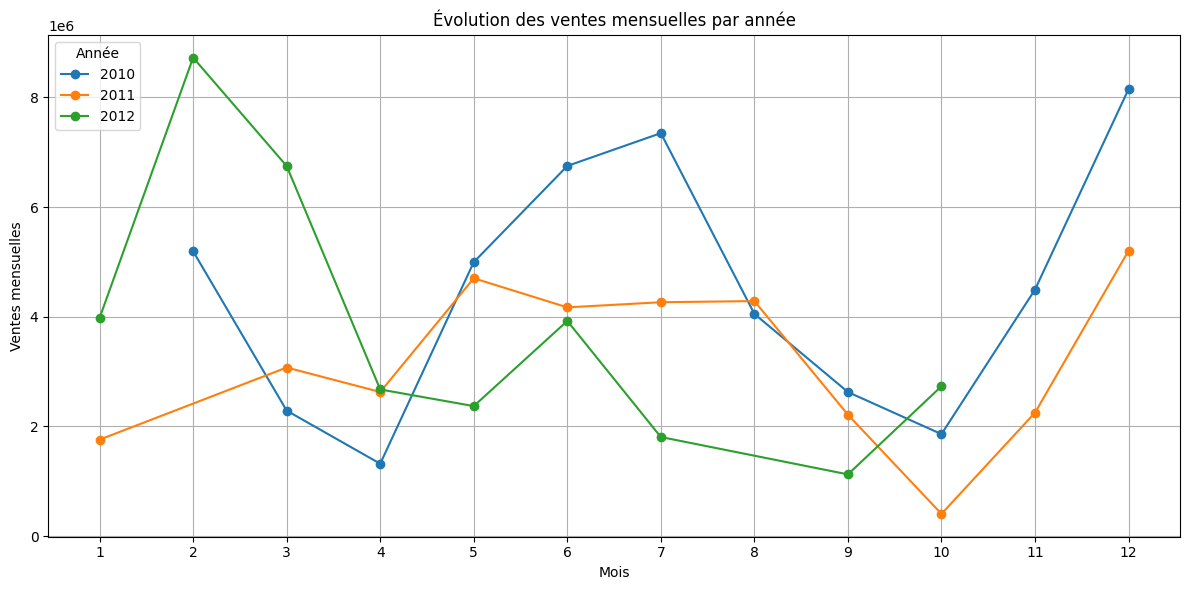

In [ ]:
import matplotlib.pyplot as plt

# Formater en string et non periode
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Grouper les ventes par (Year, Month)
grouped = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Création du graphique
plt.figure(figsize=(12, 6))

# Boucler sur chaque année pour tracer une courbe
for year in sorted(grouped['Year'].unique()):
    monthly_sales = grouped[grouped['Year'] == year]
    plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'], marker='o', label=str(year))

# Personnalisation du graphique
plt.title("Évolution des ventes mensuelles par année")
plt.xlabel("Mois")
plt.ylabel("Ventes mensuelles")
plt.xticks(range(1, 13))
plt.legend(title="Année")
plt.grid(True)
plt.tight_layout()
plt.show()


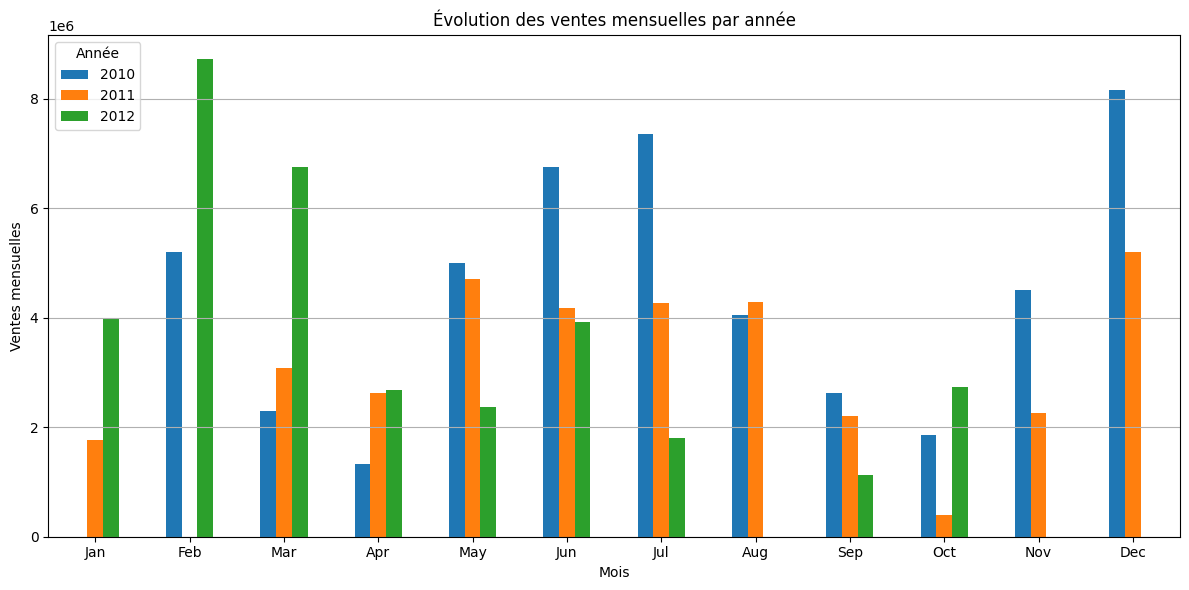

In [ ]:
pivot_df = grouped.pivot(index='Month', columns='Year', values='Weekly_Sales')

# 5. Plot groupé
pivot_df.plot(kind='bar', figsize=(12, 6))

plt.title("Évolution des ventes mensuelles par année")
plt.xlabel("Mois")
plt.ylabel("Ventes mensuelles")
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title="Année")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Peu significatif, les mois d'avril et septembre semblent toutefois etre les moins rentables

In [ ]:
df['WeekdayName'].unique()
# impossible de comparer les ventes par jour de la semaine

array(['Friday'], dtype=object)

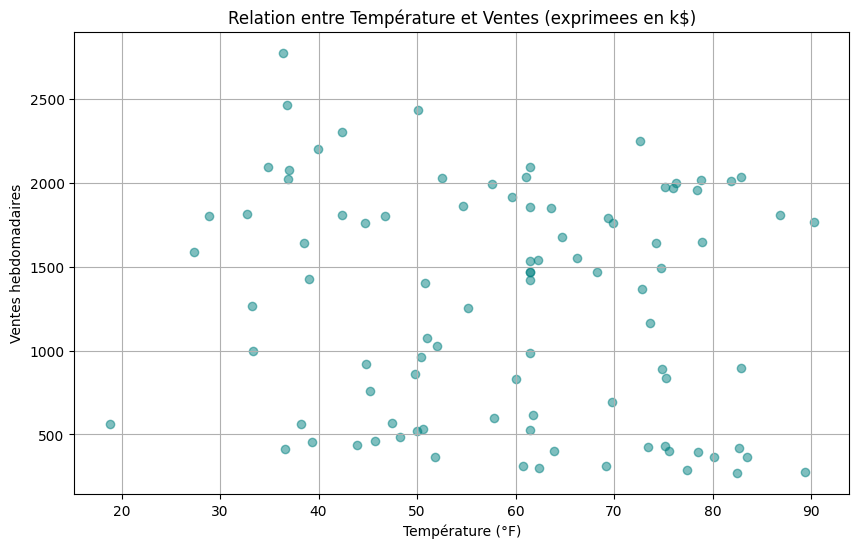

In [ ]:
plt.figure(figsize=(10, 6))
df['Weekly_Sales2'] = df['Weekly_Sales']/1000
plt.scatter(df['Temperature'], df['Weekly_Sales2'], alpha=0.5, color='teal')
plt.title("Relation entre Température et Ventes (exprimees en k$)")
plt.xlabel("Température (°F)")
plt.ylabel("Ventes hebdomadaires")
plt.grid(True)
plt.show()

# La temperature semble avoir un effet negatif sur les ventes

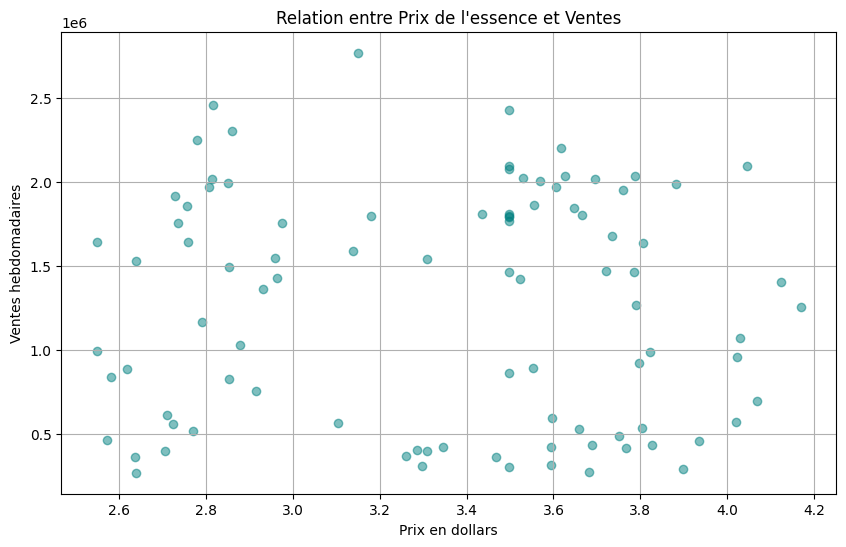

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'], alpha=0.5, color='teal')
plt.title("Relation entre Prix de l'essence et Ventes")
plt.xlabel("Prix en dollars")
plt.ylabel("Ventes hebdomadaires")
plt.grid(True)
plt.show()
# le prix de l'essence semble avoir un faible impact

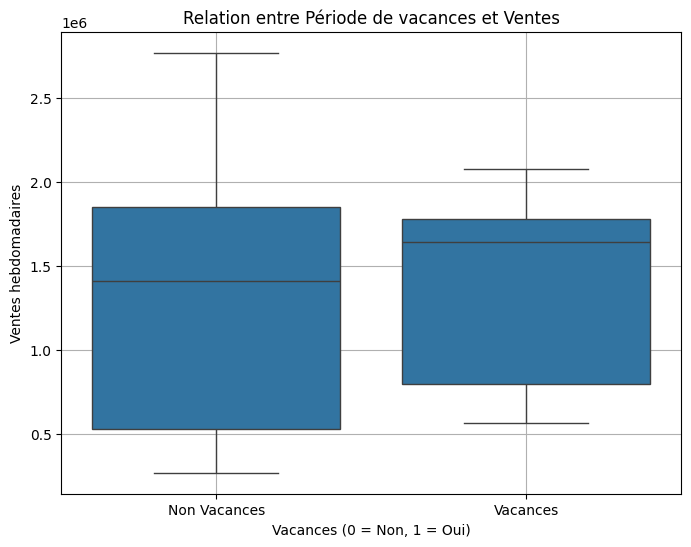

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Relation entre Période de vacances et Ventes")
plt.xlabel("Vacances (0 = Non, 1 = Oui)")
plt.ylabel("Ventes hebdomadaires")
plt.xticks([0, 1], ['Non Vacances', 'Vacances'])
plt.grid(True)
plt.show()

# On remarque une baisse des ventes en periode de vacances

# Entrainement des models

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday,WeekdayName,Month2,Weekly_Sales2
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4,Friday,2011-03,1807.54543
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4,Friday,2010-05,1644.47066
5,4.0,2010-05-28,1857533.70,0.0,61.45,2.756,126.160226,7.896,2010,5,28,4,Friday,2010-05,1857.53370
6,15.0,2011-06-03,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,6,3,4,Friday,2011-06,695.39619
7,20.0,2012-02-03,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,2,3,4,Friday,2012-02,2203.52320


In [ ]:
print("Nombre de Nan")
print(df.isna().sum())

Nombre de Nan
Store            0
Date             0
Weekly_Sales     0
Holiday_Flag     0
Temperature      0
Fuel_Price       0
CPI              0
Unemployment     0
Year             0
Month            0
Day              0
Weekday          0
WeekdayName      0
Month2           0
Weekly_Sales2    0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Préparation des features et cible
X = df[['Store','Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
        'Year', 'Month', 'Day', 'Weekday']]
y = df['Weekly_Sales']

# Séparer catégorielles et numériques
cat_features = ['Store', 'Holiday_Flag']
num_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Weekday']

# Préparation du pipeline de transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ])

# Pipeline complet : préprocessing + modèle
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Entraînement Model Regression Lineaire
print("Modele de regression Lineaire....")
pipeline_lr.fit(X_train, y_train)

# Prédictions
y_train_pred = pipeline_lr.predict(X_train)
y_pred = pipeline_lr.predict(X_test)

# Évaluation
rmse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Performance sur l'entraînement :")
print(f"  RMSE: {rmse_train:.2f}")
print(f"  R2: {r2_train:.2f}")

print("Performance sur le test :")
print(f"  RMSE: {rmse_test:.2f}")
print(f"  R2: {r2_test:.2f}")


print("Analyse: bon apprentissage, mais leger overfitting")

Modele de regression Lineaire....
Performance sur l'entraînement :
  RMSE: 10854453423.68
  R2: 0.98
Performance sur le test :
  RMSE: 84809680749.38
  R2: 0.82
Analyse: bon apprentissage, mais leger overfitting


# Features importance

  Importance des variables:


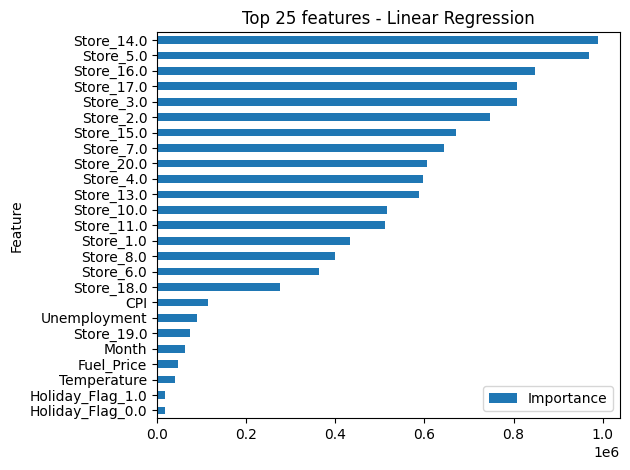

Analyse: Le profil des points de ventes explique en grande partie les resultats hebdmodaires, puis le CPI et l'absence de salaries


In [ ]:
# Features importance...
import numpy as np

# Importance des variables
print(f"  Importance des variables:")

# Récupérer les noms des colonnes après transformation
ohe = pipeline_lr.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_features)
all_feature_names = np.concatenate([cat_feature_names, num_features])


coeffs = pipeline_lr.named_steps['regressor'].coef_
coef_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': np.abs(coeffs)})

# Affichage trié
coef_df = coef_df.sort_values(by='Importance', ascending=False)

# Visualisation
coef_df.head(25).plot(kind='barh', x='Feature', y='Importance', title=f"Top 25 features - Linear Regression")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Analyse: Le profil des points de ventes explique en grande partie les resultats hebdmodaires, puis le CPI et l'absence de salaries")

# Lutter contre l'overfitting

## Utilisation de Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Pipeline de preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ])


# Pipeline complet avec Ridge
pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.05))
])


# Train/Test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Entraînement
print("Entraînement du modèle Ridge...")
pipeline_ridge.fit(X_train, y_train)


# Prédictions
y_pred_train = pipeline_ridge.predict(X_train)
y_pred_test = pipeline_ridge.predict(X_test)


# Évaluation
rmse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(" Performance sur l'entraînement :")
print(f"  RMSE: {rmse_train:,.3f}")
print(f"  R2: {r2_train:.3f}")

print(" Performance sur le test :")
print(f"  RMSE: {rmse_test:,.3f}")
print(f"  R2: {r2_test:.3f}")

Entraînement du modèle Ridge...
 Performance sur l'entraînement :
  RMSE: 10,961,303,868.148
  R2: 0.976
 Performance sur le test :
  RMSE: 83,647,098,740.111
  R2: 0.822


In [ ]:
3# Optimisation de mon Alpha
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {
    'regressor__alpha': [0.045, 0.050, 0.054, 0.055, 0.056, 0.057, 0.058, 0.06, 0.061, 0.062, 0.063, 0.064]
}

grid = GridSearchCV(
    pipeline_ridge,
    param_grid,
    scoring='r2',
    cv=10
)

grid.fit(X_train, y_train)

# Affichage du meilleur alpha et du meilleur score
print("Meilleur alpha:", grid.best_params_)
print("Meilleur score CV:", grid.best_score_)

# Prédictions sur le test set avec le meilleur modèle trouvé par GridSearchCV
y_pred_test = grid.predict(X_test)

# Affichage des prédictions ou de l'évaluation
r2_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test)

print(f"R² sur test  : {r2_test:.3f}")
print(f"RMSE test    : {rmse_test:.3f}")

print("Analyse : J'ai reduit l'overfitting par un model moins complexe, j'ai augmente la regularisation alpha. Pour autant pas d'amelioration de mes predictions")

Meilleur alpha: {'regressor__alpha': 0.063}
Meilleur score CV: 0.9030233304628201
R² sur test  : 0.822
RMSE test    : 83387882678.415
Analyse : J'ai reduit l'overfitting par un model moins complexe, j'ai augmente la regularisation alpha. Pour autant pas d'amelioration de mes predictions


In [ ]:
from sklearn.model_selection import cross_val_score

# Validation croisée avec le meilleur modèle sur le test set
cross_val_scores = cross_val_score(best_model, X_test, y_test, cv=4, scoring='r2')
# Oblige de reduire mon CV car taille du test set trop faible
print(f"Scores R² sur le test set : {cross_val_scores}")
print(f"R² moyen sur le test set : {cross_val_scores.mean()}")

print("Taille du test set insuffisant pour une cross validation")


Scores R² sur le test set : [ 0.67054697 -2.52968251 -0.16501448 -0.76105024]
R² moyen sur le test set : -0.6963000629655328
Taille du test set insuffisant pour une cross validation


## Utilisation de Lasso

In [ ]:
from sklearn.linear_model import Lasso
# 4. Pipeline avec Lasso
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1, random_state=42, max_iter=10000))
])

# 5. Entraînement
lasso_pipeline.fit(X_train, y_train)

# 6. Prédictions
y_train_pred = lasso_pipeline.predict(X_train)
y_test_pred = lasso_pipeline.predict(X_test)

# 7. Évaluation
rmse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(" Résultats du modèle Lasso :")
print(f"  ➤ R² entraînement : {r2_train:.4f}")
print(f"  ➤ RMSE entraînement : {rmse_train:,.2f}")
print(f"  ➤ R² test : {r2_test:.4f}")
print(f"  ➤ RMSE test : {rmse_test:,.2f}")

 Résultats du modèle Lasso :
  ➤ R² entraînement : 0.9762
  ➤ RMSE entraînement : 10,854,453,431.35
  ➤ R² test : 0.8218
  ➤ RMSE test : 83,676,128,307.06


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.703e+10, tolerance: 3.382e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# 4. Grille d'hyperparamètres
param_grid = {
    'regressor__alpha': np.logspace(-5, -1, 10)
}

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. GridSearchCV
grid = GridSearchCV(
    lasso_pipeline,
    param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

# 7. Résultats
best_model = grid.best_estimator_  # Récupère le meilleur modèle trouvé
best_alpha = grid.best_params_['regressor__alpha']  # Récupère le meilleur alpha
best_score = grid.best_score_  # Récupère le meilleur score R² (cross-validation)

# Affichage des résultats
print(f"Meilleur alpha : {best_alpha}")
print(f"Meilleur score R² (cross-validation) : {best_score:.4f}")

# 8. Évaluation finale
y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test)

print(f" Performance sur le test : R² = {r2_test:.4f} | RMSE = {rmse_test:,.2f}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Meilleur alpha : 0.1
Meilleur score R² (cross-validation) : 0.8989
 Performance sur le test : R² = 0.8218 | RMSE = 83,676,128,307.06


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.703e+10, tolerance: 3.382e+09
  model = cd_fast.enet_coordinate_descent(


## Utilisation de XGBoost

In [ ]:
# Entrainement d'un model de Random Forest
from sklearn.ensemble import RandomForestRegressor

# Pipeline avec Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Reutilisation du même preprocessor
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

# Entraînement du modèle Random Forest
print(" Entraînement du modèle Random Forest...")
pipeline_rf.fit(X_train, y_train)

# Prédictions
y_pred_train_rf = pipeline_rf.predict(X_train)
y_pred_test_rf = pipeline_rf.predict(X_test)

# Évaluation
rmse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

rmse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print("Performance Random Forest - Entraînement :")
print(f"  RMSE: {rmse_train_rf:,.2f}")
print(f"  R2: {r2_train_rf:.2f}")

print("Performance Random Forest - Test :")
print(f"  RMSE: {rmse_test_rf:,.2f}")
print(f"  R2: {r2_test_rf:.2f}")

 Entraînement du modèle Random Forest...
Performance Random Forest - Entraînement :
  RMSE: 19,757,206,875.22
  R2: 0.96
Performance Random Forest - Test :
  RMSE: 128,345,960,489.20
  R2: 0.73


In [ ]:
# Essai avec XGboost
from xgboost import XGBRegressor

# 1. Preprocessing
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('num', StandardScaler(), num_features)
])

# 2. Modèle avec les bons hyperparamètres
xgb_model = XGBRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=1.0,
    reg_alpha=0.1,
    reg_lambda=1.0,
    objective='reg:squarederror',
    random_state=42
)

# 3. Pipeline complet
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

# 4. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entraînement
print("Entraînement du pipeline XGBoost...")
pipeline_xgb.fit(X_train, y_train)

# 6. Prédictions
y_pred_train = pipeline_xgb.predict(X_train)
y_pred_test = pipeline_xgb.predict(X_test)

# 7. Évaluation
rmse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Performance XGBoost - Entraînement :")
print(f"  RMSE: {rmse_train:,.3f}")
print(f"  R2: {r2_train:.3f}")

print("Performance XGBoost - Test :")
print(f"  RMSE: {rmse_test:,.3f}")
print(f"  R2: {r2_test:.3f}")

print("Analyse: Malgre une optimisation des hyperparametres, l'overfitting est toujours present. Mais le XGboost semble fournir la meilleure performance de prediction")

Entraînement du pipeline XGBoost...
Performance XGBoost - Entraînement :
  RMSE: 909,794,966.505
  R2: 0.998
Performance XGBoost - Test :
  RMSE: 63,480,985,676.080
  R2: 0.865


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [250, 300, 350],
    'regressor__max_depth': [3, 5, 4],
    'regressor__learning_rate': [0.08, 0.1, 0.13],
    'regressor__subsample': [0.7, 1.0, 1.3],
    'regressor__colsample_bytree': [0.9, 1.0, 1.1]
}

grid_search = GridSearchCV(
    pipeline_xgb,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Best params:", grid_search.best_params_)

# Évaluation sur test
y_pred_test = grid_search.predict(X_test)
print("R² test:", r2_score(y_test, y_pred_test))


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best params: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 350, 'regressor__subsample': 1.0}
R² test: 0.8888230802721091


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, *

run 1:

>Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best params: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 300, 'regressor__subsample': 1.0}
R² test: 0.8887908756685985

run 2:


>  for each of 108 candidates, totalling 324 fits
Best params: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 350, 'regressor__subsample': 1.0}
R² test: 0.8888230802721091





# Compilation des performances sous differents regulateurs

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=0.059),
    'Lasso': Lasso(alpha=0.001),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=350, learning_rate=0.1, max_depth=3,
                             random_state=42, objective='reg:squarederror')}

# 5. Boucle d’évaluation
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    results.append({
        'Modèle': name,
        'R² Train': r2_score(y_train, y_train_pred),
        'RMSE Train': mean_squared_error(y_train, y_train_pred),
        'R² Test': r2_score(y_test, y_test_pred),
        'RMSE Test': mean_squared_error(y_test, y_test_pred)
    })

# 6. Résultats en DataFrame
results_df = pd.DataFrame(results).sort_values(by='R² Test', ascending=False)
print(results_df)

print("Analyse: Dans le cadre d'une mise en production, il sera privilegie le XBoost pour un deploiement. L'ideal serait de labeliser certaines donnees absentes et d'obtenir plus de donnees.")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.860e+11, tolerance: 3.382e+09
  model = cd_fast.enet_coordinate_descent(


              Modèle  R² Train    RMSE Train   R² Test     RMSE Test
4            XGBoost  0.999937  2.872038e+07  0.888823  5.220936e+10
2              Lasso  0.976249  1.085445e+10  0.822686  8.326754e+10
1              Ridge  0.975929  1.100083e+10  0.822267  8.346474e+10
0  Linear Regression  0.976249  1.085445e+10  0.819403  8.480968e+10
3      Random Forest  0.951376  2.222211e+10  0.748806  1.179621e+11
